In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
import keras
import tensorflow
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array , load_img
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.listdir("/content/drive/MyDrive/plantvillage dataset/color")

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___Black_rot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___Common_rust_',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Corn_(maize)___healthy',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Tomato___Leaf_Mold',
 'Tomato___Target_Spot',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Septoria_leaf_spot',
 'Tomato___L

#Preprocessing Data

In [7]:

train_datagen =ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function= preprocess_input )
val_datagen =ImageDataGenerator(preprocessing_function= preprocess_input )


In [8]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/plantvillage dataset/color",
                                           target_size= (256,256),
                                           batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/plantvillage dataset/color",
                                           target_size= (256,256),
                                           batch_size=32)

Found 54635 images belonging to 38 classes.
Found 54635 images belonging to 38 classes.


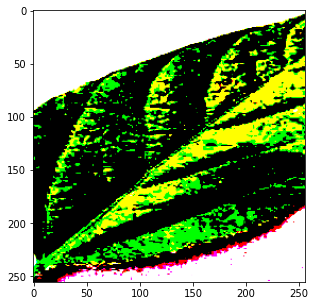

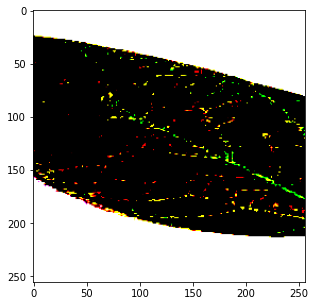

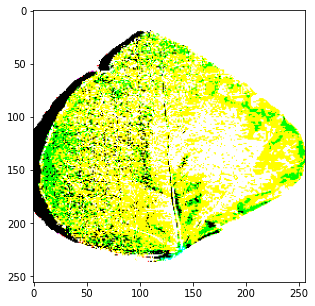

In [9]:
t_img,label = train.next()
def plotImage(img_arr, label):
   for im, l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()
plotImage(t_img[:3], label[:3])


#BUILDING OUR MODEL :

In [10]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [11]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 3s 0us/step


In [12]:
for layer in base_model.layers:
 layer.trainable = False

In [13]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
X = Flatten()(base_model.output)

X = Dense(units= 38, activation="softmax")(X)

#Creating our model
model = Model(base_model. input, X)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

# Early Stopping & Model Check Points

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


#Early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)

# model check point
mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy', min_delta= 0.01, patience= 3, verbose=1, save_best_only=True)

cb=[es,mc] 

In [17]:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy , metrics= ['accuracy'])


In [18]:
his = model. fit_generator(train ,
steps_per_epoch= 16,
epochs= 50,
verbose= 1,
callbacks= cb ,
validation_data= val ,
validation_steps= 16 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 29.6185 - accuracy: 0.2383 
Epoch 1: val_accuracy improved from -inf to 0.58594, saving model to best_model.h5
16/16 [==============================] - 540s 34s/step - loss: 29.6185 - accuracy: 0.2383 - val_loss: 12.0243 - val_accuracy: 0.5859
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.5842 - accuracy: 0.4609 
Epoch 2: val_accuracy improved from 0.58594 to 0.66406, saving model to best_model.h5
16/16 [==============================] - 511s 33s/step - loss: 14.5842 - accuracy: 0.4609 - val_loss: 7.7212 - val_accuracy: 0.6641
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 9.3156 - accuracy: 0.6191 
Epoch 3: val_accuracy improved from 0.66406 to 0.71484, saving model to best_model.h5
16/16 [==============================] - 508s 33s/step - loss: 9.3156 - accuracy: 0.6191 - val_loss: 6.8564 - val_accuracy: 0.7148
Epoch 4/50
16/16 [==============================] - ETA: 0s - 

In [19]:
h=his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

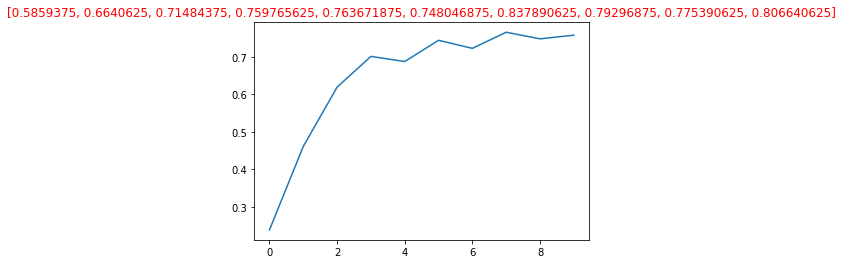

In [20]:
plt.plot(h["accuracy"])
plt.title(h["val_accuracy"],c="red")
plt.show("Accuracy VS Validation_Accuracy")

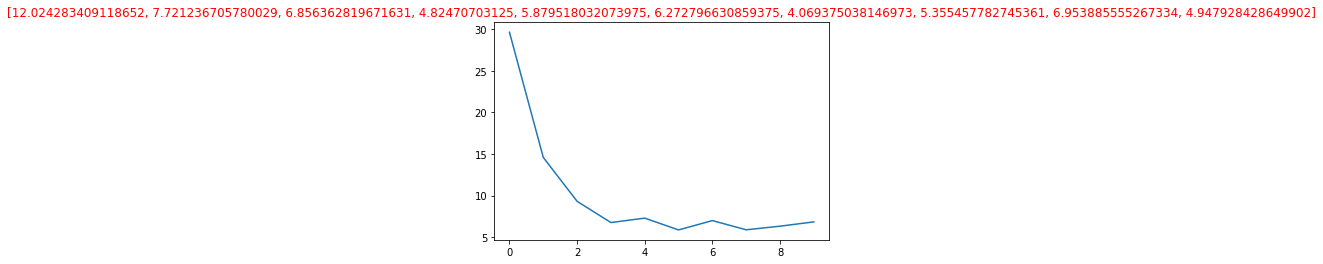

In [21]:
plt.plot(h["loss"])
plt.title(h["val_loss"],c="red")
plt.show("Loss VS Validation_Loss")

#Load the Best Model

In [22]:
from keras.models import load_model

model = load_model("/content/best_model.h5")


In [23]:
acc = model.evaluate_generator(val)[1]

print(f"The accuracy of your model is", {acc*100})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: ignored

In [24]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys()) ))
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

# Making Prediction

In [25]:
def prediction(path):
 img = load_img(path, target_size= (256,256))
 i  = img.to_array(img)
 im = preprocess_input(i)
 img = np.expand_dims(im , axis= 0)
 pred = np.argmax(model.predict(img))

 print(f' The image belongs to  { ref[pred] } ')


In [26]:
path ="/content/drive/MyDrive/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"

prediction(path)

AttributeError: ignored

In [28]:
model_version=1
model.save(f"../models/{model_version}")
print("complete")


complete
